<a href="https://colab.research.google.com/github/cdl-hanyang/cdl2022-s-ml/blob/main/week1_1_polynomial_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Target function:
$$
y = \sin\left(2\pi x\right)
$$

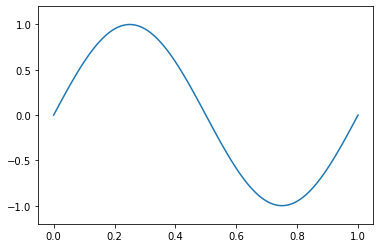

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(2*np.pi*x)
xspan = np.linspace(0, 1, 101)
plt.plot(xspan, f(xspan))
plt.ylim(-1.2, 1.2)
plt.show()

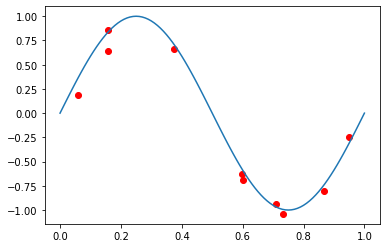

In [ ]:
N = 10 # number of samples
sigma = 0.1 # standard deviation for noise
np.random.seed(42)
x_train = np.random.rand(N)
y_train = f(x_train) + sigma*np.random.randn(N)
plt.plot(xspan, f(xspan))
plt.scatter(x_train, y_train, color='r', marker='o')
plt.show()

###Polynomial hypothesis model:
$$
\begin{aligned}
\hat{y}\left(x;\mathbf w\right) &= w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M \\
&= \sum_{m=0}^M w_mx^m
\end{aligned}
$$

In [ ]:
M = 0 # Polynomial order
X = np.stack([x_train**i for i in range(M + 1)], axis=1)


###Least square method:
$$ \hat{\mathbf y} = \mathbf X \mathbf w $$
$$\min_{\mathbf w} \mathcal{L}\left(\mathbf w\right) = \frac{1}{2}\left\|\hat{\mathbf y}\left(\mathbf w\right) - \mathbf y\right\|^2 $$

###Optimality condition:
$$
\begin{aligned}
\nabla_{\mathbf w}\mathcal{L} &= \mathbf X^\mathsf T \left(\hat{\mathbf y} - \mathbf y\right) \\
&= \mathbf X^\mathsf T \mathbf X \mathbf w - \mathbf X^\mathsf T \mathbf y \\
&= \mathbf 0
\end{aligned}
$$

###Optimal weight:
$$\mathbf w^* = \left(\mathbf X^\mathsf T \mathbf X\right)^{-1}\mathbf X^\mathsf T \mathbf y$$

In [ ]:
w_opt = np.linalg.solve(X.T@X, X.T@y_train)
print(w_opt)
fhat = lambda x: np.stack([x**i for i in range(M + 1)], axis=1)@w_opt

[-0.20074697]


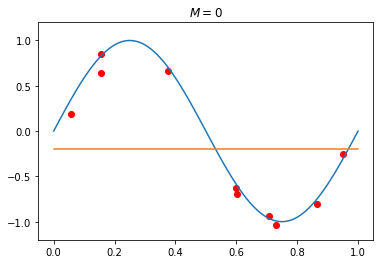

In [ ]:
plt.plot(xspan, f(xspan))
plt.plot(xspan, fhat(xspan))
plt.scatter(x_train, y_train, color='r', marker='o')
plt.ylim(-1.2, 1.2)
plt.title(fr'$M = {M:d}$')
plt.show()

In [ ]:
def polyLSM(x, y, M=0):
    """ 1-D polynomial curve fitting using least square method (LSM)
    Args
    ====
        x (ndarray): Training samples
        y (ndarray): Target responses for training samples
        M (int): Polynomial order

    Returns
    =======
        fhat (function): Polynomial hypothesis model
        w (ndarray): Optimal weight vector
        err (float): Training error (NRMSE)
    """
    X = np.stack([x**i for i in range(M + 1)], axis=1)
    w = np.linalg.solve(X.T@X, X.T@y)
    yhat = X@w
    err = np.sqrt(np.mean((yhat - y)**2))
    fhat = lambda x: np.stack([x**i for i in range(M + 1)], axis=1)@w
    return fhat, w, err

In [ ]:
x_test = np.random.rand(N)
y_test = f(x_test)
err_train_list = []
err_test_list = []
print('Polynomial order vs. NRMSE')
for M in range(9):
    fhat, _, err_train = polyLSM(x_train, y_train, M)
    err_train_list.append(err_train)
    yhat_test = fhat(x_test)
    err_test = np.sqrt(np.mean((yhat_test - y_test)**2))
    err_test_list.append(err_test)
    print(f'M={M}, Train: {err_train:.3e}, Test: {err_test:.3e}')

Polynomial order vs. NRMSE
M=0, Train: 6.888e-01, Test: 7.822e-01
M=1, Train: 4.301e-01, Test: 4.509e-01
M=2, Train: 4.085e-01, Test: 5.216e-01
M=3, Train: 7.088e-02, Test: 1.119e-01
M=4, Train: 7.079e-02, Test: 1.137e-01
M=5, Train: 5.827e-02, Test: 8.293e-02
M=6, Train: 5.303e-02, Test: 7.920e-02
M=7, Train: 5.029e-02, Test: 4.511e-01
M=8, Train: 5.021e-02, Test: 9.484e-01


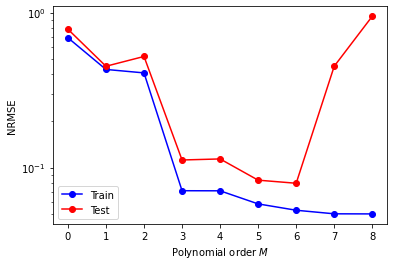

In [ ]:
plt.semilogy(np.arange(9), err_train_list, 'bo-', label='Train')
plt.semilogy(np.arange(9), err_test_list, 'ro-', label='Test')
plt.xlabel(f'Polynomial order $M$')
plt.ylabel('NRMSE')
plt.legend()
plt.show()